# Movie Recommendation System 

**Library Installation:**

In [202]:
!pip install requests
!pip install pandas
!pip install scikit-learn

**Text Similarity using Cosine Similarity:**

In [204]:
import pandas as pd
import numpy as np
import requests
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

**Fetch Popular Movies from TMDb API:**

In [206]:
api_key = '638754c73aa7573cd1669163032da419'
# API  URL to fetch popular movies
url = f'https://api.themoviedb.org/3/movie/popular?api_key={api_key}&language=en-US&page=1'

# Get response from the API
response = requests.get(url)

# Parse the response as JSON
data = response.json()

# Display the first 5 movies
data['results'][:5]


[{'adult': False,
  'backdrop_path': '/fTrQsdMS2MUw00RnzH0r3JWHhts.jpg',
  'genre_ids': [28, 80, 53],
  'id': 1197306,
  'original_language': 'en',
  'original_title': 'A Working Man',
  'overview': "Levon Cade left behind a decorated military career in the black ops to live a simple life working construction. But when his boss's daughter, who is like family to him, is taken by human traffickers, his search to bring her home uncovers a world of corruption far greater than he ever could have imagined.",
  'popularity': 942.1209,
  'poster_path': '/xUkUZ8eOnrOnnJAfusZUqKYZiDu.jpg',
  'release_date': '2025-03-26',
  'title': 'A Working Man',
  'video': False,
  'vote_average': 6.314,
  'vote_count': 409},
 {'adult': False,
  'backdrop_path': '/op3qmNhvwEvyT7UFyPbIfQmKriB.jpg',
  'genre_ids': [14, 12, 28],
  'id': 324544,
  'original_language': 'en',
  'original_title': 'In the Lost Lands',
  'overview': 'A queen sends the powerful and feared sorceress Gray Alys to the ghostly wilderness o

**Convert API Response to DataFrame:**

In [208]:
# Convert data to a DataFrame
movies = pd.json_normalize(data['results'])

movies.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/fTrQsdMS2MUw00RnzH0r3JWHhts.jpg,"[28, 80, 53]",1197306,en,A Working Man,Levon Cade left behind a decorated military ca...,942.1209,/xUkUZ8eOnrOnnJAfusZUqKYZiDu.jpg,2025-03-26,A Working Man,False,6.314,409
1,False,/op3qmNhvwEvyT7UFyPbIfQmKriB.jpg,"[14, 12, 28]",324544,en,In the Lost Lands,A queen sends the powerful and feared sorceres...,481.1120,/t6HJH3gXtUqVinyFKWi7Bjh73TM.jpg,2025-02-27,In the Lost Lands,False,6.292,269
2,False,/2Nti3gYAX513wvhp8IiLL6ZDyOm.jpg,"[10751, 35, 12, 14]",950387,en,A Minecraft Movie,Four misfits find themselves struggling with o...,517.5425,/yFHHfHcUgGAxziP1C3lLt0q2T4s.jpg,2025-03-31,A Minecraft Movie,False,6.200,705
3,False,/k32XKMjmXMGeydykD32jfER3BVI.jpg,"[28, 9648, 18]",1045938,en,G20,After the G20 Summit is overtaken by terrorist...,288.9191,/wv6oWAleCJZUk5htrGg413t3GCy.jpg,2025-04-09,G20,False,6.669,356
4,False,/jhL4eTpccoZSVehhcR8DKLSBHZy.jpg,"[28, 53, 878]",822119,en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,329.1585,/pzIddUEMWhWzfvLI3TwxUG2wGoi.jpg,2025-02-12,Captain America: Brave New World,False,6.100,1598


**Select Key Columns from Movie Data:**

In [210]:
# Select important columns
movies = movies[['id','title','overview','genre_ids']]

movies.head()

,id,title,overview,genre_ids
0,1197306,A Working Man,Levon Cade left behind a decorated military ca...,"[28, 80, 53]"
1,324544,In the Lost Lands,A queen sends the powerful and feared sorceres...,"[14, 12, 28]"
2,950387,A Minecraft Movie,Four misfits find themselves struggling with o...,"[10751, 35, 12, 14]"
3,1045938,G20,After the G20 Summit is overtaken by terrorist...,"[28, 9648, 18]"
4,822119,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,"[28, 53, 878]"


**Check and Clean Missing Data in Movie Dataset:**

In [212]:
# Check for missing values
print(movies.isnull().sum())

# Drop rows with missing overviews
movies = movies.dropna(subset=['overview'])

id           0
title        0
overview     0
genre_ids    0
dtype: int64


**Convert Movie Overviews to Vectors using CountVectorizer:**

In [214]:
# Convert overview to vectors
cv= CountVectorizer(stop_words='english')
vectors = cv.fit_transform(movies['overview']).toarray()

# Check shape of vectorized data
vectors.shape

(20, 358)

**Calculate Cosine Similarity for Movie Overviews:**

In [216]:
# Cosine similarity calculation 
similarity = cosine_similarity(vectors)

**Recommend Similar Movies Based on Cosine similarity:**

In [218]:
def recommend(movie):
    # Check if movie is in the dataset
    if movie not in movies['title'].values:
        return "Movie not found in the database."
    
    # Get the index of the movie
    index = movies[movies['title'] == movie].index[0]

    # Get similarity scores for all movies with this movie
    distances = similarity[index]

    # Sort movies based on similarity (except itself)
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    # Print top 5 similar movies
    print(f"Top recommendations for '{movie}':\n")
    for i in movie_list:
        print(movies.iloc[i[0]].title)

In [219]:
recommend('In the Lost Lands')

Top recommendations for 'In the Lost Lands':

Moana 2
Mufasa: The Lion King
A Minecraft Movie
Conclave
A Working Man


**Movie data overview and Missing Values Check:**

In [221]:
movies.info()
movies.describe()
movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         20 non-null     int64 
 1   title      20 non-null     object
 2   overview   20 non-null     object
 3   genre_ids  20 non-null     object
dtypes: int64(1), object(3)
memory usage: 772.0+ bytes


id           0
title        0
overview     0
genre_ids    0
dtype: int64

**Enrich Movie data with Additional Details from TMDb API:**

In [223]:
import requests

# Dummy list of movie IDs from  data
movie_ids = movies['id'].tolist()

# Prepare empty list to store enriched data
enriched_data = []

for movie_id in movie_ids:
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US"
    response = requests.get(url)
    data = response.json()

    enriched_data.append({
        "id": movie_id,
        "title": data.get("title"),
        "release_date": data.get("release_date"),
        "vote_average": data.get("vote_average"),
        "vote_count": data.get("vote_count"),
        "popularity": data.get("popularity"),
        "runtime": data.get("runtime"),
        "genres": [genre['name'] for genre in data.get("genres", [])]
    })

In [224]:
enriched_df = pd.DataFrame(enriched_data)
enriched_df.head()

,id,title,release_date,vote_average,vote_count,popularity,runtime,genres
0,1197306,A Working Man,2025-03-26,6.319,411,942.1209,116,"[Action, Crime, Thriller]"
1,324544,In the Lost Lands,2025-02-27,6.292,269,481.1120,102,"[Fantasy, Adventure, Action]"
2,950387,A Minecraft Movie,2025-03-31,6.200,705,517.5425,101,"[Family, Comedy, Adventure, Fantasy]"
3,1045938,G20,2025-04-09,6.668,355,288.9191,110,"[Action, Mystery, Drama]"
4,822119,Captain America: Brave New World,2025-02-12,6.100,1598,329.1585,119,"[Action, Thriller, Science Fiction]"


*Plot Top 10 Most Popular Movies Based on Popularity:*

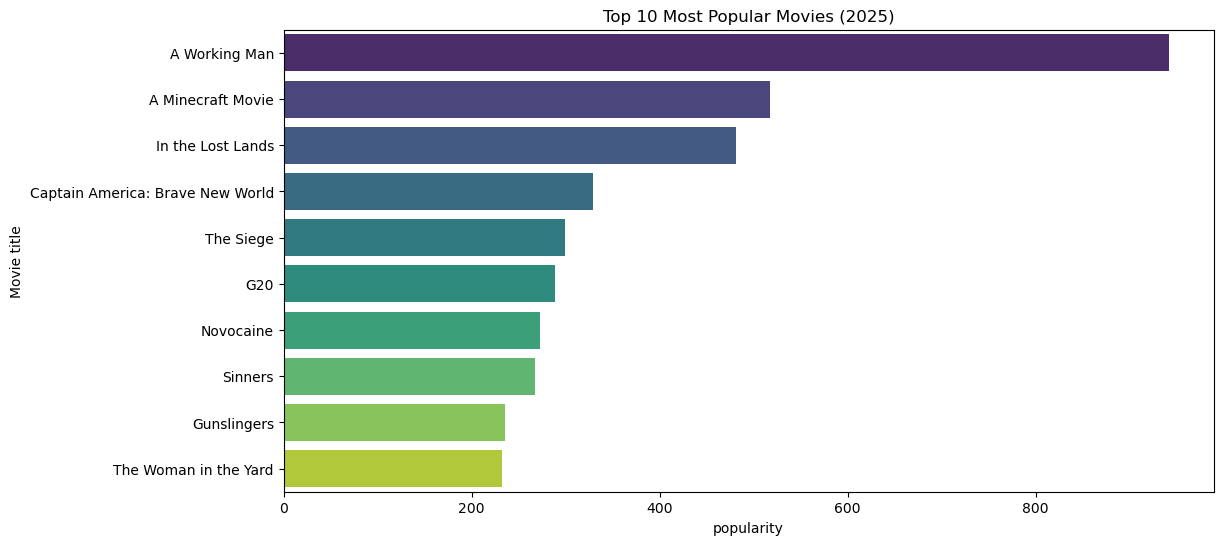

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

top_popular = enriched_df.sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_popular, x='popularity', y='title', palette='viridis')
plt.title("Top 10 Most Popular Movies (2025)")
plt.xlabel("popularity")
plt.ylabel("Movie title")
plt.show()


*Visualize Top 10 Movies by Vote Count:*

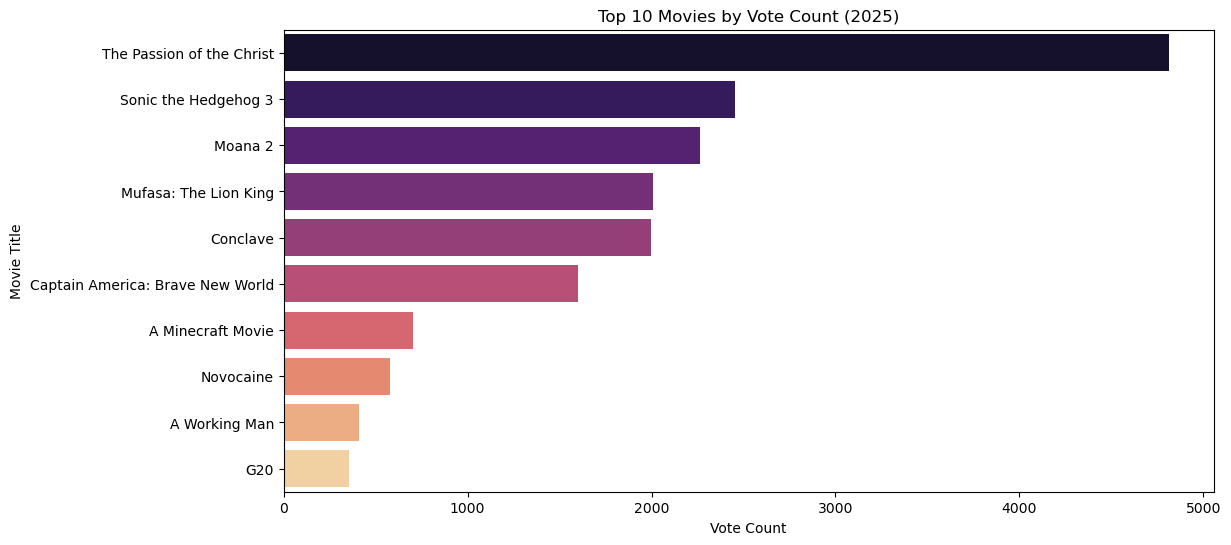

In [228]:
top_votes = enriched_df.sort_values(by='vote_count', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_votes, x='vote_count', y='title', palette='magma')
plt.title("Top 10 Movies by Vote Count (2025)")
plt.xlabel("Vote Count")
plt.ylabel("Movie Title")
plt.show()


*Visualize Movie Distribution Across Genres:*

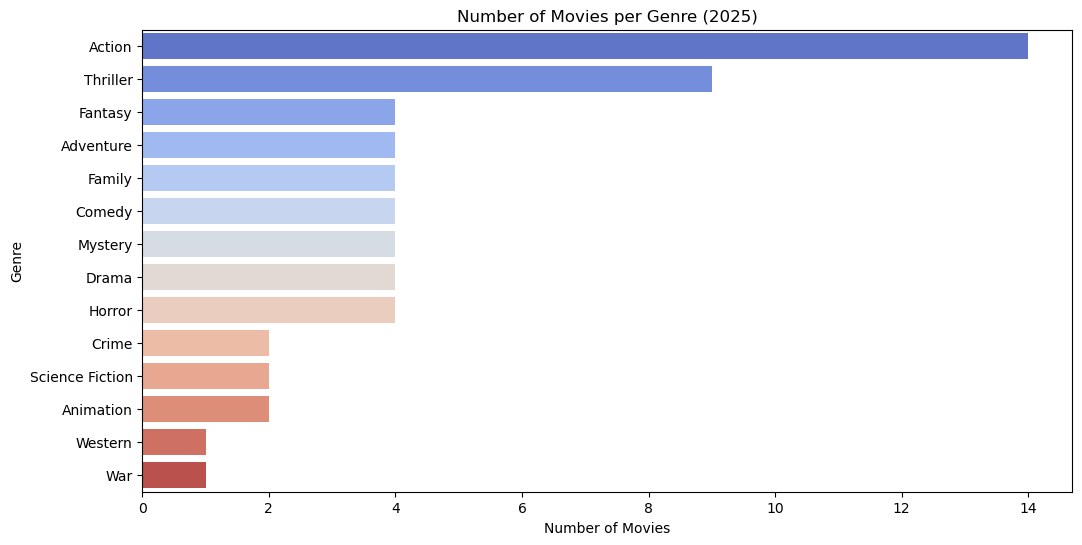

In [230]:
from collections import Counter

# Flatten all genres into one list
genre_list = [genre for sublist in enriched_df['genres'] for genre in sublist]

# Count frequency
genre_count = Counter(genre_list)
genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=genre_df, x='Count', y='Genre', palette='coolwarm')
plt.title("Number of Movies per Genre (2025)")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

*Scatter Plot of Vote Count vs Popularity with Bubble Size and Color:*

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

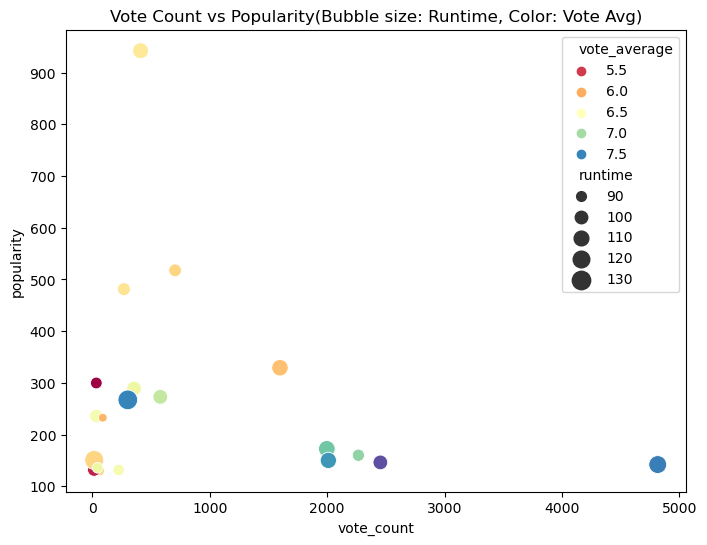

In [232]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=enriched_df, x='vote_count', y='popularity', hue='vote_average', size='runtime', palette='Spectral', sizes=(40,200))
plt.title("Vote Count vs Popularity(Bubble size: Runtime, Color: Vote Avg)")
plt.xlable("vote count")
plt.ylabel("popularity")
plt.legend()
plt.show()

*Visualize Top 10 Movies by Average Rating:*

In [ ]:
top_movies = enriched_df.sort_values(by='vote_average', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_movies, x='vote_average', y='title', palette='mako')
plt.title("Top 10 Movies by Average Rating (2025)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

In [ ]:
popular_high_votes = enriched_df[(enriched_df['vote_count'] > 500)]
popular_high_votes[['title', 'vote_average', 'vote_count', 'popularity']].sort_values(by='popularity', ascending=False)

*Histogram of Movie Runtime Distribution:*

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(enriched_df['runtime'], bins=20, kde=True, color='orange')
plt.title("Runtime Distribution of Movies")
plt.xlabel("Runtime(minutes)")
plt.ylabel("Count")
plt.show()

*Average Rating by Genre:*

In [ ]:
genre_rating = []

for idx, row in enriched_df.iterrows():
    for genre in row['genres']:
        genre_rating.append((genre, row['vote_average']))

genre_rating_df = pd.DataFrame(genre_rating, columns=['Genre', 'Rating'])
avg_genre_rating = genre_rating_df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_genre_rating.plot(kind='bar', color='skyblue')
plt.title("Average Rating by Genre")
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.show()

*Average Popularity by Genre:*

In [ ]:
genre_popularity = []

for idx, row in enriched_df.iterrows():
    for genre in row['genres']:
        genre_popularity.append((genre, row['popularity']))

genre_popularity_df = pd.DataFrame(genre_popularity, columns=['Genre', 'Popularity'])
avg_genre_popularity = genre_popularity_df.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_genre_popularity.plot(kind='bar', color='lightgreen')
plt.title("Average Popularity by Genre")
plt.ylabel("Average Popularity")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.show()

*Average Rating by Runtime Group:*

In [ ]:
max_runtime = enriched_df['runtime'].max()

# Check if max_runtime > 180, else set it to 181 to keep bins increasing
if max_runtime <= 180:
    max_runtime = 181

bins = [0, 90, 120, 150, 180, max_runtime]
labels = ['<90', '90-120', '120-150', '150-180', '>180']

enriched_df['runtime_group'] = pd.cut(enriched_df['runtime'], bins=bins, labels=labels)

group_rating = enriched_df.groupby('runtime_group')['vote_average'].mean()

plt.figure(figsize=(8,5))
group_rating.plot(kind='bar', color='purple')
plt.title("Average Rating by Runtime Group")
plt.xlabel("Runtime Group (min)")
plt.ylabel("Average Vote")
plt.show()

*Average Rating by Release Year:*

In [ ]:
enriched_df['release_year'] = pd.to_datetime(enriched_df['release_date']).dt.year
yearly_rating = enriched_df.groupby('release_year')['vote_average'].mean()

plt.figure(figsize=(10,6))
yearly_rating.plot(kind='line', marker='o', color='red')
plt.title("Average Rating by Release Year")
plt.xlabel("Year")
plt.ylabel("Average Vote")
plt.grid(True)
plt.show()

*Top 10 Rated Movies with Vote Count>50:*

In [ ]:
top_movies = enriched_df[enriched_df['vote_count'] > 50].sort_values(by='vote_average', ascending=False).head(10)
sns.barplot(data=top_movies, x='vote_average', y='title', palette='viridis')
plt.title("Top 10 Rated Movies (Vote Count > 50)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

*Correlation Heatmap of Numeric Features:*

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(enriched_df[['vote_average', 'vote_count', 'popularity', 'runtime']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Numeric Features")
plt.show()

*Average Popularity OverYears:*

In [ ]:
enriched_df['release_year'] = pd.to_datetime(enriched_df['release_date']).dt.year
yearly_popularity = enriched_df.groupby('release_year')['popularity'].mean()
plt.figure(figsize=(10,5))
yearly_popularity.plot()
plt.title("Average Popularity Over Years")
plt.xlabel("Release Year")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()